In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("boston_train.csv",low_memory=False)
df2=pd.read_csv("boston_test.csv",low_memory=False)

In [3]:
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [4]:
df2.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [5]:
df.shape

(400, 15)

In [6]:
df2.shape

(105, 14)

In [7]:
s=set(df.columns)
t=set(df2.columns)
s^t                 #There is no 'MEDV' data in test dataset. We have to Predict 'MEDV'.

{'MEDV'}

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       105 non-null    int64  
 1   CRIM     105 non-null    float64
 2   ZN       105 non-null    float64
 3   INDUS    105 non-null    float64
 4   CHAS     105 non-null    int64  
 5   NOX      105 non-null    float64
 6   RM       105 non-null    float64
 7   AGE      105 non-null    float64
 8   DIS      105 non-null    float64
 9   RAD      105 non-null    int64  
 10  TAX      105 non-null    float64
 11  PTRATIO  105 non-null    float64
 12  B        105 non-null    float64
 13  LSTAT    105 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.6 KB


In [11]:
df.drop(columns=['ID'],inplace=True)
df.drop_duplicates(inplace=True)

In [12]:
df2.drop(columns=['ID'],inplace=True)
df2.drop_duplicates(inplace=True)

In [13]:
df.shape,df2.shape

((400, 14), (105, 13))

In [19]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [18]:
a=['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound','Leather']
for i in df.columns:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
    print("{} lower threshold :{} and upper threshold :{}".format(i,lower_threshold, upper_threshold))

CRIM lower threshold :-5.1205912499999995 and upper threshold :8.74183875
ZN lower threshold :-18.75 and upper threshold :31.25
INDUS lower threshold :-14.325000000000006 and upper threshold :37.55500000000001
CHAS lower threshold :0.0 and upper threshold :0.0
NOX lower threshold :0.18650000000000005 and upper threshold :0.8865
RM lower threshold :4.763000000000002 and upper threshold :7.734999999999999
AGE lower threshold :-34.80000000000001 and upper threshold :171.0
DIS lower threshold :-2.549025 and upper threshold :9.872775
RAD lower threshold :-26.0 and upper threshold :54.0
TAX lower threshold :-306.5 and upper threshold :1249.5
PTRATIO lower threshold :13.199999999999998 and upper threshold :24.4
B lower threshold :345.86000000000007 and upper threshold :426.5399999999999
LSTAT lower threshold :-7.889999999999999 and upper threshold :31.79
MEDV lower threshold :5.2500000000000036 and upper threshold :36.849999999999994


In [20]:
a=['CRIM', 'ZN', 'INDUS', 'RM', 'RAD', 'LSTAT', 'MEDV']
for i in a:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
    df[i]=df[i].clip(lower_threshold, upper_threshold)

# EDA

### 1.CRIM

per capita crime rate by town

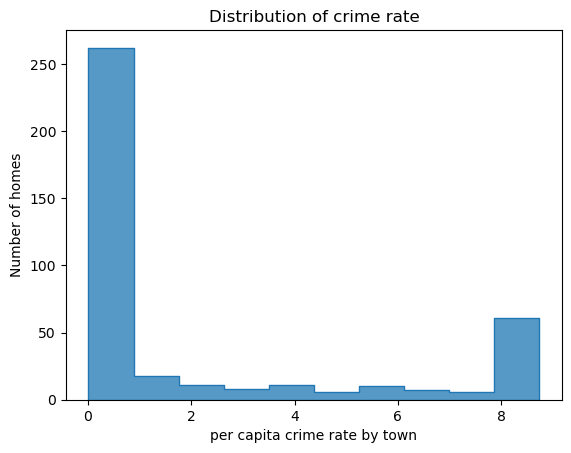

In [40]:
sns.histplot(df, x = "CRIM",element='step'); #using seaborn
plt.xlabel("per capita crime rate by town");
plt.ylabel("Number of homes")
plt.title("Distribution of crime rate");

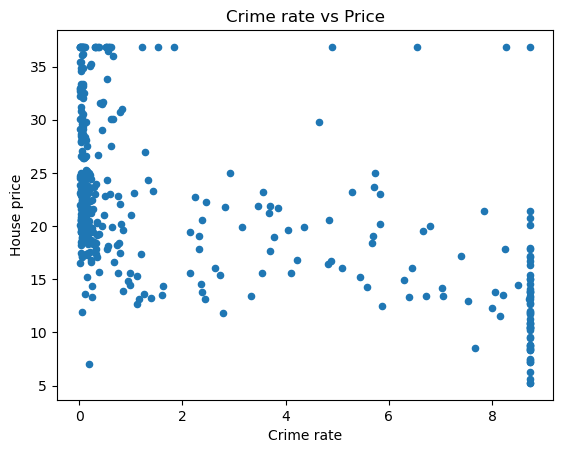

In [26]:
df.plot(x="CRIM",y="MEDV",kind="scatter",title="Crime rate vs Price",xlabel="Crime rate",ylabel="House price");

In [28]:
df[['CRIM','MEDV']].corr()

,CRIM,MEDV
CRIM,1.000000,-0.556479
MEDV,-0.556479,1.000000


There is Negative correlation between CRIME and MEDV.It means house price is high where there is low crime rate

### 2.ZN

proportion of residential land zoned for lots over 25,000 sq.ft.

In [51]:
df['ZN'].value_counts()

0.00     296
31.25     52
20.00     19
25.00      9
22.00      7
12.50      7
30.00      4
21.00      3
28.00      2
17.50      1
Name: ZN, dtype: int64

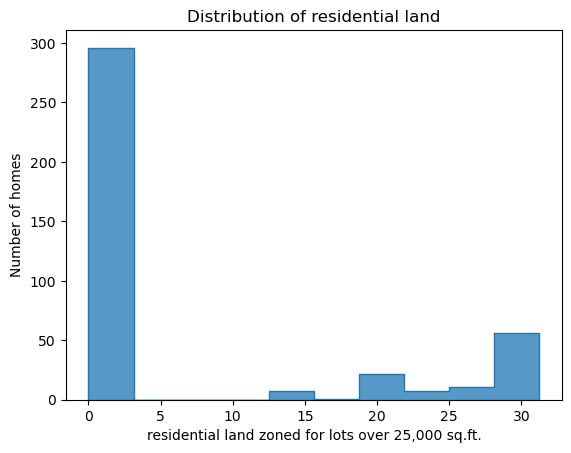

In [42]:
sns.histplot(df, x = "ZN",element='step'); #using seaborn
plt.xlabel("residential land zoned for lots over 25,000 sq.ft.");
plt.ylabel("Number of homes")
plt.title("Distribution of residential land");

In [49]:
df.groupby("ZN")["MEDV"].mean()

ZN
0.00     19.921453
12.50    20.385714
17.50    33.000000
20.00    32.526316
21.00    21.200000
22.00    23.878571
25.00    23.155556
28.00    23.950000
30.00    23.175000
31.25    27.850000
Name: MEDV, dtype: float64

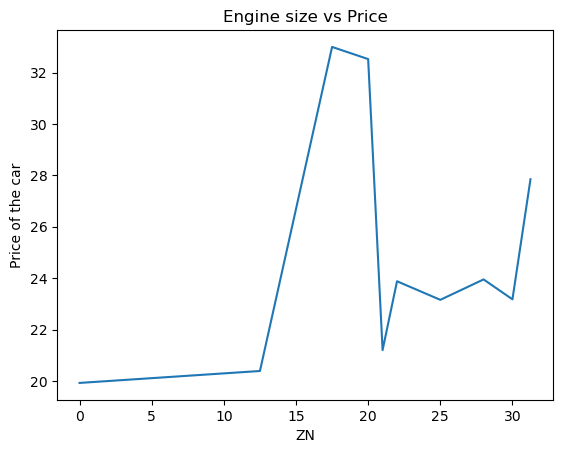

In [48]:
df.groupby("ZN")["MEDV"].mean().plot(ylabel="Price of the car",title="Engine size vs Price");

In [50]:
df[['ZN', 'MEDV']].corr()

,ZN,MEDV
ZN,1.00000,0.41341
MEDV,0.41341,1.00000


There is Positive correlation between ZN and MEDV.It means house price is high where land zoned for lots over 25,000 sq.ft

### 3.INDUS

proportion of non-retail business acres per town.

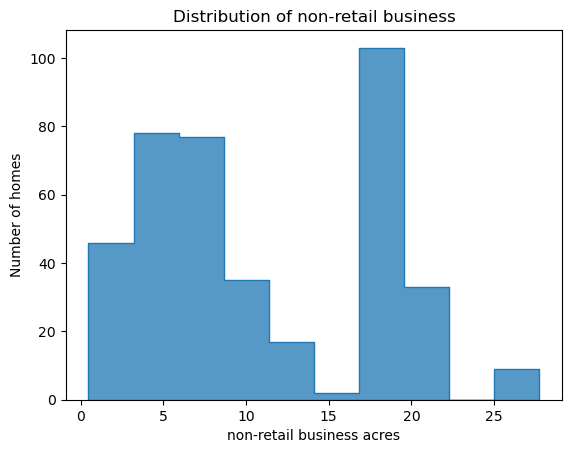

In [55]:
sns.histplot(df, x = "INDUS",element='step'); #using seaborn
plt.xlabel("non-retail business acres");
plt.ylabel("Number of homes")
plt.title("Distribution of non-retail business");

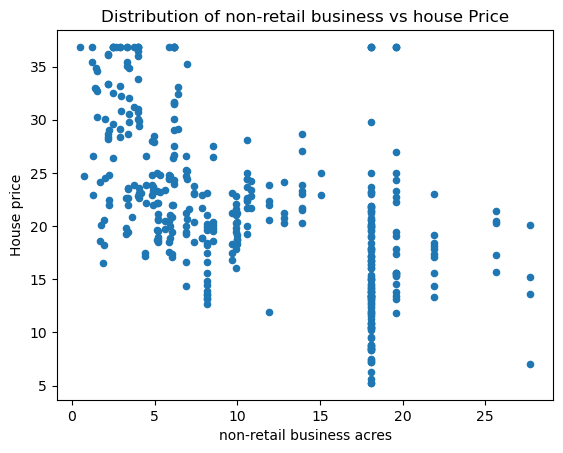

In [56]:
df.plot(x="INDUS",y="MEDV",kind="scatter",title="Distribution of non-retail business vs house Price",xlabel="non-retail business acres",ylabel="House price");

In [57]:
df[['INDUS', 'MEDV']].corr()

,INDUS,MEDV
INDUS,1.000000,-0.578952
MEDV,-0.578952,1.000000


There is Negative correlation between INDUS and MEDV.It means house price is high where there is low non-retail business acres.

### 4.CHAS

Charles River dummy variable (1 if tract bounds river; 0 otherwise)

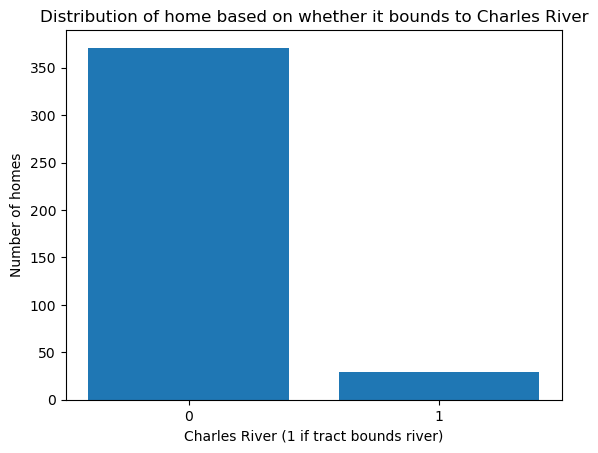

In [58]:
labels,counts=np.unique(df['CHAS'],return_counts=True)
plt.bar(labels,counts);
plt.gca().set_xticks(labels);
plt.xlabel("Charles River (1 if tract bounds river)");
plt.ylabel("Number of homes");
plt.title("Distribution of home based on whether it bounds to Charles River");

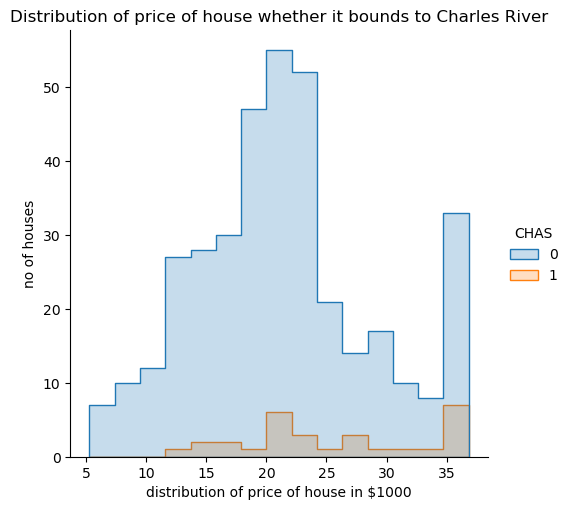

In [70]:
sns.displot(df,x="MEDV",hue="CHAS",element="step",kind="hist")
plt.xlabel("distribution of price of house in $1000")
plt.ylabel("no of houses")
plt.title("Distribution of price of house whether it bounds to Charles River")
plt.show()

In [71]:
df[['CHAS','MEDV']].corr()

,CHAS,MEDV
CHAS,1.000000,0.151579
MEDV,0.151579,1.000000


There is no correlation between CHAS and MEDV.It means house price are does not depend on whether it bounds to Charles River

### 5.NOX

nitric oxides concentration (parts per 10 million)

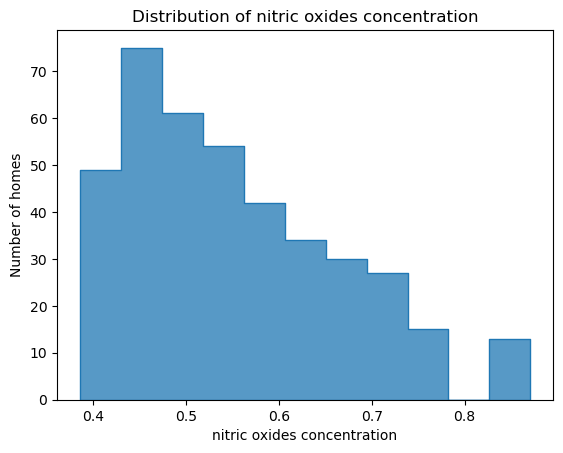

In [72]:
sns.histplot(df, x = "NOX",element='step'); #using seaborn
plt.xlabel("nitric oxides concentration");
plt.ylabel("Number of homes")
plt.title("Distribution of nitric oxides concentration");

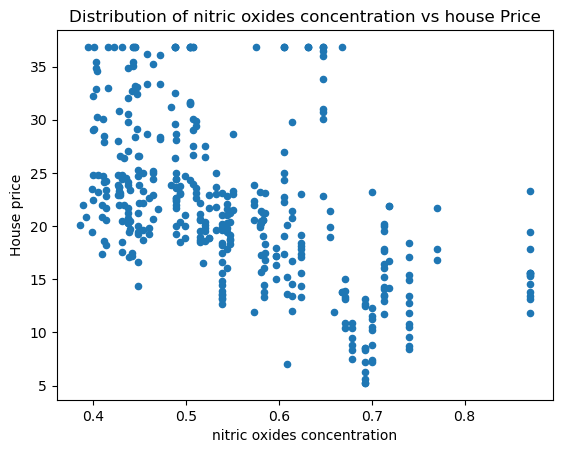

In [73]:
df.plot(x="NOX",y="MEDV",kind="scatter",title="Distribution of nitric oxides concentration vs house Price",xlabel="nitric oxides concentration",ylabel="House price");

In [74]:
df[['NOX','MEDV']].corr()

,NOX,MEDV
NOX,1.000000,-0.517141
MEDV,-0.517141,1.000000


There is Negative correlation between NOX and MEDV.It means house price is high where there is low nitric oxides concentration.

### 6.RM

average number of rooms per dwelling

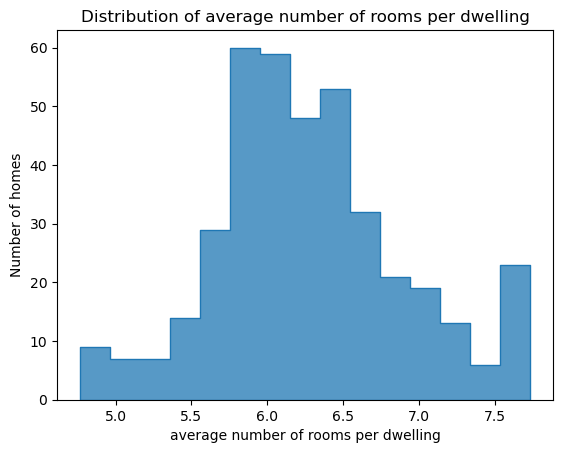

In [77]:
sns.histplot(df, x = "RM",element='step'); #using seaborn
plt.xlabel("average number of rooms per dwelling");
plt.ylabel("Number of homes")
plt.title("Distribution of average number of rooms per dwelling");

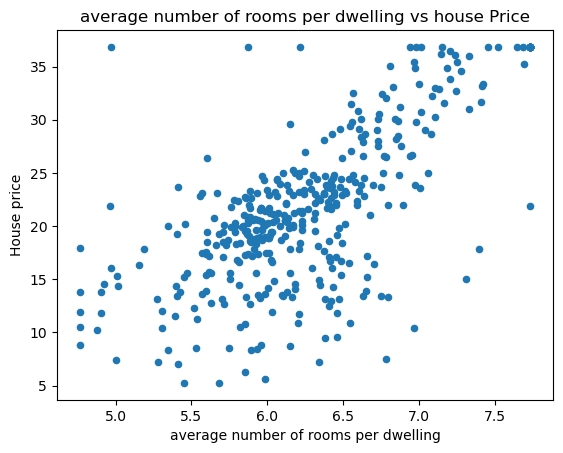

In [78]:
df.plot(x="RM",y="MEDV",kind="scatter",title="average number of rooms per dwelling vs house Price",xlabel="average number of rooms per dwelling",ylabel="House price");

In [79]:
df[['RM','MEDV']].corr()

,RM,MEDV
RM,1.000000,0.714046
MEDV,0.714046,1.000000


There is Positive correlation between RM and MEDV.It means house price is high which has higher number of rooms.

### 7.AGE

proportion of owner-occupied units built prior to 1940

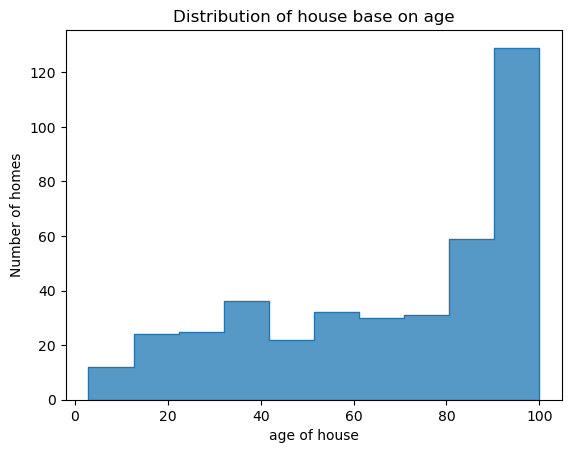

In [80]:
sns.histplot(df, x = "AGE",element='step'); #using seaborn
plt.xlabel("age of house");
plt.ylabel("Number of homes")
plt.title("Distribution of house base on age");

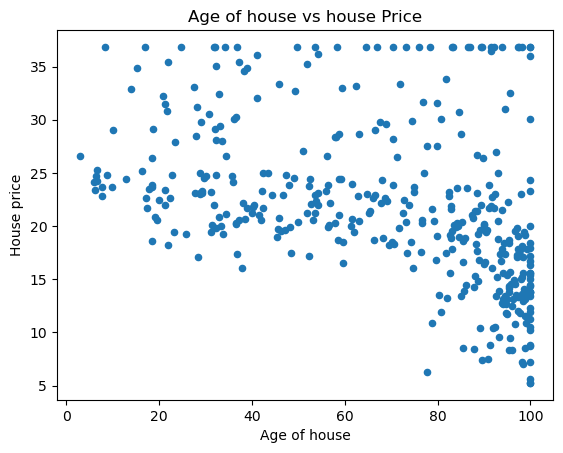

In [81]:
df.plot(x="AGE",y="MEDV",kind="scatter",title="Age of house vs house Price",xlabel="Age of house",ylabel="House price");

In [82]:
df[['AGE','MEDV']].corr()

,AGE,MEDV
AGE,1.000000,-0.434162
MEDV,-0.434162,1.000000


There is Negative correlation between AGE and MEDV. It means price of house is low which is older.

### 8.DIS

weighted distances to five Boston employment centres

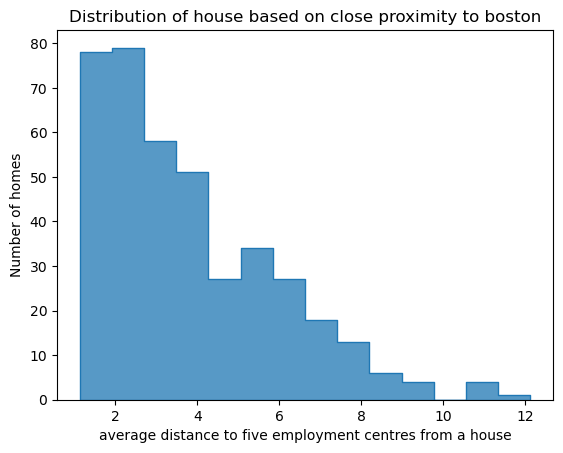

In [83]:
sns.histplot(df, x = "DIS",element='step'); #using seaborn
plt.xlabel("average distance to five employment centres from a house");
plt.ylabel("Number of homes")
plt.title("Distribution of house based on close proximity to boston");

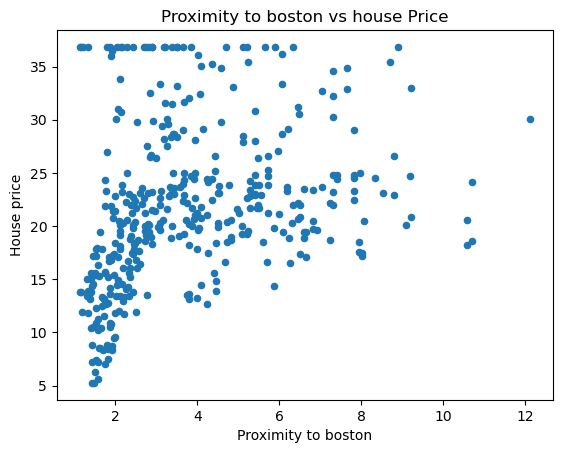

In [84]:
df.plot(x="DIS",y="MEDV",kind="scatter",title="Proximity to boston vs house Price",xlabel="Proximity to boston",ylabel="House price");

In [85]:
df[['DIS','MEDV']].corr()

,DIS,MEDV
DIS,1.000000,0.312905
MEDV,0.312905,1.000000


There is Positive correlation between DIS and MEDV.It means house price is high which is closer to boston employment centre.

### 9.RAD

index of accessibility to radial highways

In [89]:
df['RAD'].value_counts()

24    103
4      90
5      90
3      33
8      20
1      17
6      17
2      17
7      13
Name: RAD, dtype: int64

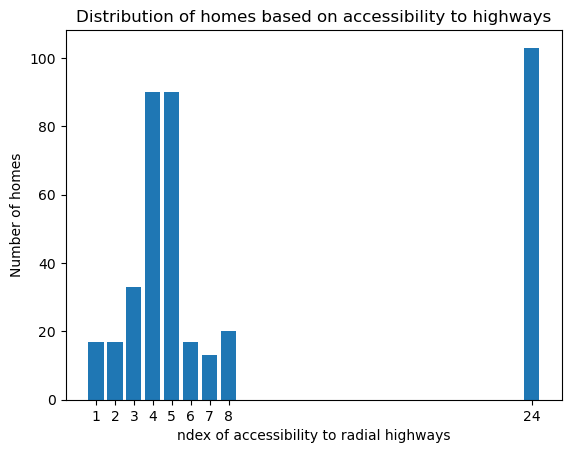

In [114]:
labels,counts=np.unique(df['RAD'],return_counts=True)
plt.bar(labels,counts);
plt.gca().set_xticks(labels);
plt.xlabel("ndex of accessibility to radial highways");
plt.ylabel("Number of homes");
plt.title("Distribution of homes based on accessibility to highways");

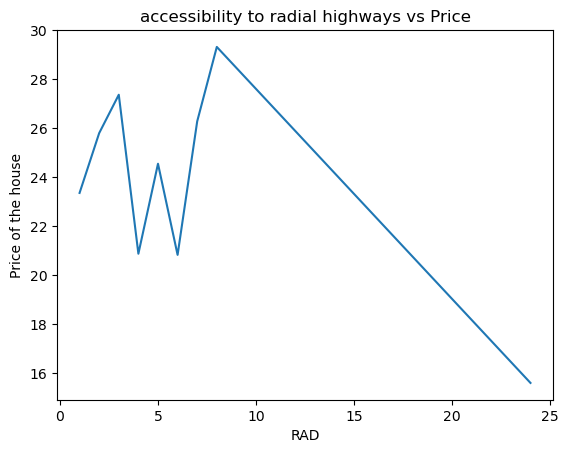

In [94]:
df.groupby("RAD")["MEDV"].mean().plot(ylabel="Price of the house",title="accessibility to radial highways vs Price");

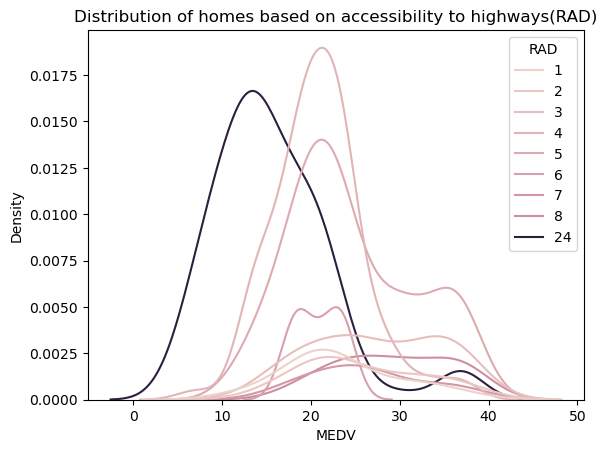

In [101]:
sns.kdeplot(data=df, x="MEDV", hue="RAD");
plt.title("Distribution of homes based on accessibility to highways(RAD)");

In [102]:
df[['RAD','MEDV']].corr()

,RAD,MEDV
RAD,1.000000,-0.463328
MEDV,-0.463328,1.000000


There is Negative correlation between RAD and MEDV. It means price of house is high which has lower index of accessibility to Highway

### 10.TAX

full-value property-tax rate per $10,000

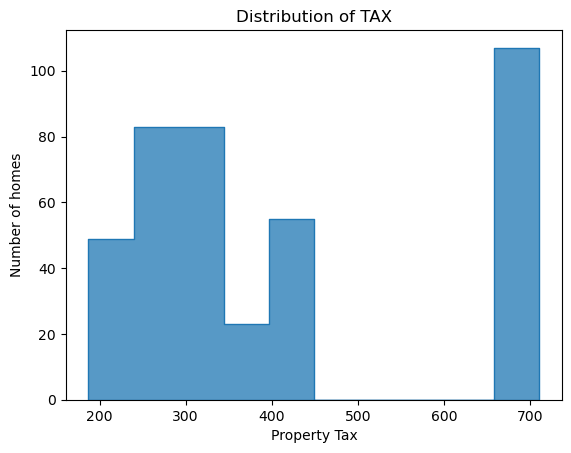

In [113]:
sns.histplot(df, x = "TAX",element='step'); #using seaborn
plt.xlabel("Property Tax");
plt.ylabel("Number of homes")
plt.title("Distribution of TAX");

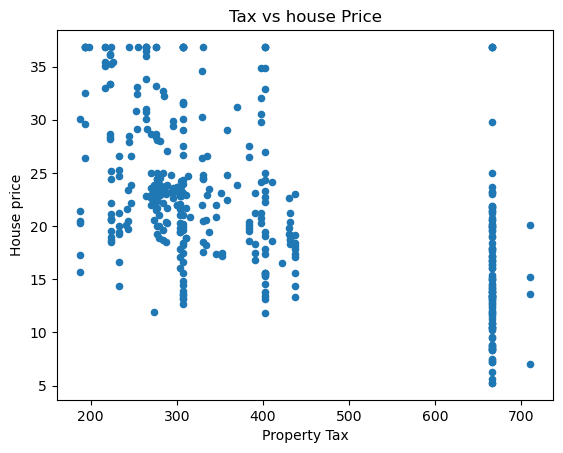

In [108]:
df.plot(x="TAX",y="MEDV",kind="scatter",title="Tax vs house Price",xlabel="Property Tax",ylabel="House price");

In [109]:
df[['TAX','MEDV']].corr()

,TAX,MEDV
TAX,1.000000,-0.557146
MEDV,-0.557146,1.000000


There is Negative correlation between TAX and MEDV. It means price of house is high which has lower Property Tax.

### 11.PTRATIO

pupil-teacher ratio by town

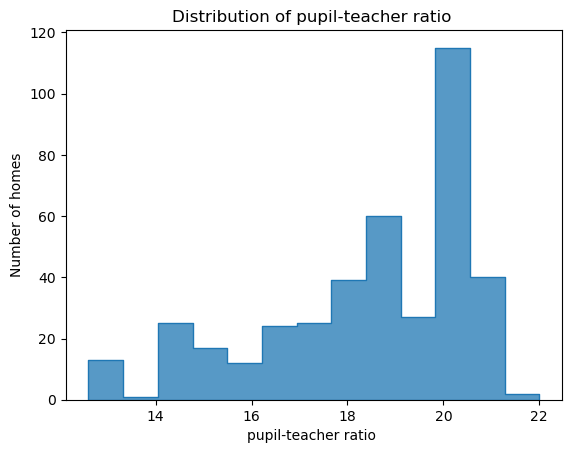

In [112]:
sns.histplot(df, x = "PTRATIO",element='step'); #using seaborn
plt.xlabel("pupil-teacher ratio ");
plt.ylabel("Number of homes")
plt.title("Distribution of pupil-teacher ratio ");

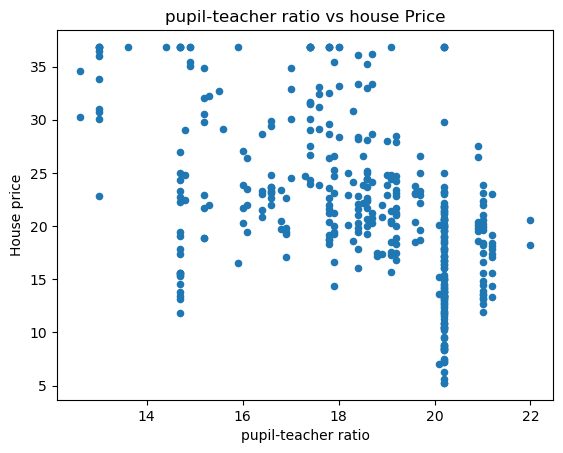

In [115]:
df.plot(x="PTRATIO",y="MEDV",kind="scatter",title="pupil-teacher ratio vs house Price",xlabel="pupil-teacher ratio",ylabel="House price");

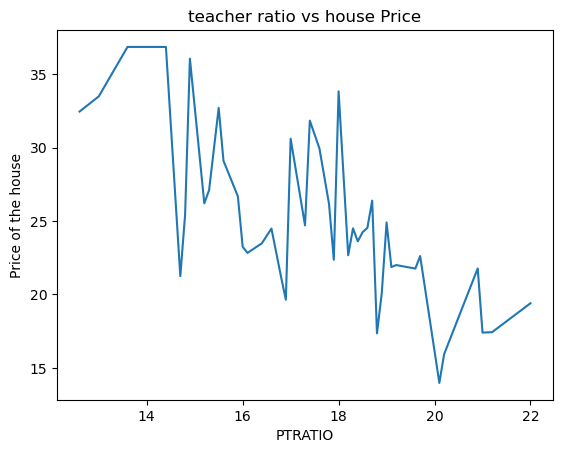

In [117]:
df.groupby("PTRATIO")["MEDV"].mean().plot(ylabel="Price of the house",title="teacher ratio vs house Price");

In [118]:
df[['PTRATIO','MEDV']].corr()

,PTRATIO,MEDV
PTRATIO,1.000000,-0.515434
MEDV,-0.515434,1.000000


There is Negative correlation between PTRATIO and MEDV. It means price of house is high which is in area where there is more teacher per unit population of pupil.

### 12.B

1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

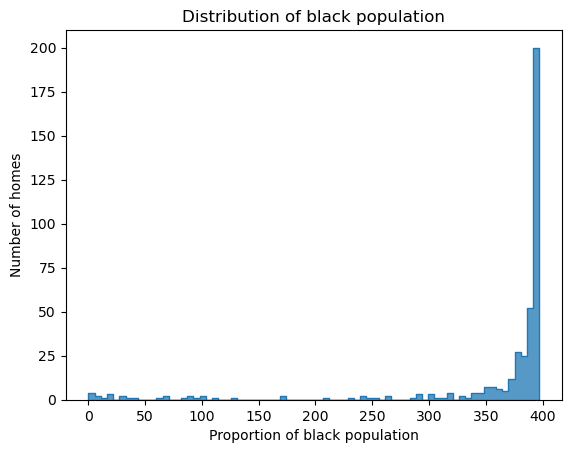

In [120]:
sns.histplot(df, x = "B",element='step'); #using seaborn
plt.xlabel("Proportion of black population");
plt.ylabel("Number of homes")
plt.title("Distribution of black population");

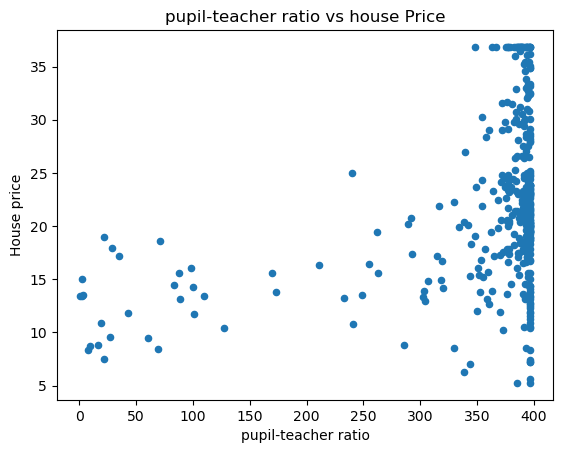

In [123]:
df.plot(x="B",y="MEDV",kind="scatter",title="pupil-teacher ratio vs house Price",xlabel="pupil-teacher ratio",ylabel="House price");

In [124]:
df[['B', 'MEDV']].corr()

,B,MEDV
B,1.000000,0.362065
MEDV,0.362065,1.000000


There is Positive correlation between B and MEDV.It means house price is high where there is higher proportion of black population.

### 13.LSTAT

% lower status of the population

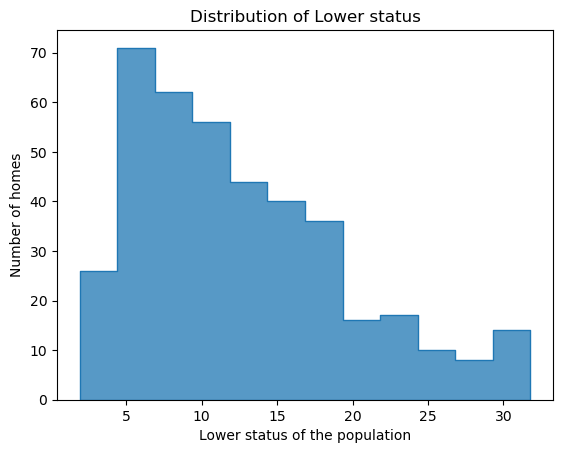

In [127]:
sns.histplot(df, x = "LSTAT",element='step'); #using seaborn
plt.xlabel("Lower status of the population");
plt.ylabel("Number of homes")
plt.title("Distribution of Lower status");

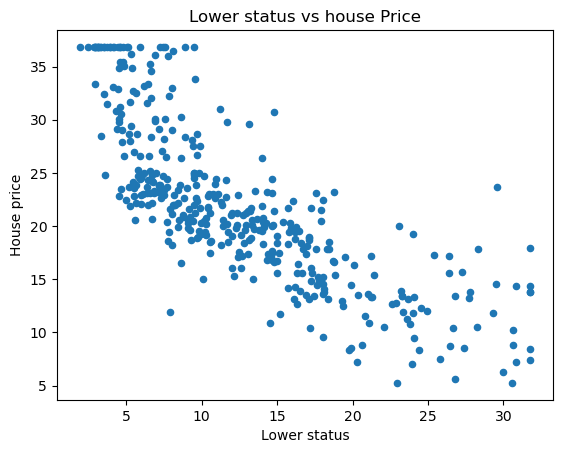

In [129]:
df.plot(x="LSTAT",y="MEDV",kind="scatter",title="Lower status vs house Price",xlabel="Lower status",ylabel="House price");

In [130]:
df[['LSTAT', 'MEDV']].corr()

,LSTAT,MEDV
LSTAT,1.000000,-0.789196
MEDV,-0.789196,1.000000


There is Negative correlation between LSTAT and MEDV. It means price of house is high which is in area where there is less lower status population resides.

### Linear Regression 

##### Splitting,Scaling

In [137]:
X = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']].values #array of features
y = df['MEDV'].values #array of targets
X1=df2[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']].values
X_train=X
y_train=y
X_test=X1

In [138]:
from sklearn.preprocessing import MinMaxScaler ## MinMax scaling 
scaler = MinMaxScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test)

##### Modelling

In [227]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [228]:
y_pred = regressor.predict(X_test_scaled)
y_pred

array([ 23.96219893,  25.01528448,  12.70789832,  20.48062336,
        21.78785866,  22.54005108,  18.67810409,  22.28011122,
        32.02525348,  15.28227611,  25.32982   ,  19.6544358 ,
        20.85937427,  15.64009147,  20.42036352,  26.86650349,
        17.50015749,  25.08574816,  19.96196324,  21.60671999,
        24.19875186,  33.56538396,  23.95825887,   7.61878373,
        15.32570775,   6.43745833,  15.89177044,  20.68936824,
        23.76472609,  16.31570035,  34.67073901,  18.67928373,
        18.98568365,  19.73773846,  25.62528586,  21.46583407,
        29.92582099,  29.58422406,  36.54732058,  26.21917997,
        15.83888784,  26.36442392,  24.20309038,  15.49686501,
        18.83555054,  25.63556224,  14.69229833,  23.89463859,
        15.41127274,  14.29286844,  20.55459361,  31.99926413,
        21.51223465, -18.97094738,  14.23944096,  16.5938137 ,
        20.799495  ,  13.41769971,   5.07455363,  18.90698194,
        19.73070371,  20.13646822,  31.62229487,  24.62

In [196]:
a=np.arange(105)

In [197]:
data={"ID":a,"Predicted MEDV":y_pred}

In [198]:
D=pd.DataFrame(data)

In [199]:
D.head()

,ID,Predicted MEDV
0,0,23.962199
1,1,25.015284
2,2,12.707898
3,3,20.480623
4,4,21.787859


In [202]:
D.to_csv("Output LinearRegression",index=False)

In [229]:
coef=pd.DataFrame(regressor.coef_,[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']],["Coefficients"])
coef

,Coefficients
CRIM,-4.614853
ZN,0.796730
INDUS,-0.020411
NOX,-5.944506
RM,10.431142
AGE,-0.758720
DIS,-10.351420
RAD,7.578698
TAX,-6.033901
PTRATIO,-7.669317


In [203]:
print("Intercept is",regressor.intercept_)

Intercept is 28.56894899774364


### L1 regularization (Lasso)

In [204]:
from sklearn import linear_model

In [205]:
#dir(linear_model)

In [225]:
from sklearn.linear_model import Lasso
regressor2 = Lasso()
regressor2.fit(X_train_scaled, y_train)

Lasso()

In [226]:
y_pred2 = regressor2.predict(X_test_scaled)
y_pred2

array([22.27097128, 23.39269498, 19.11178568, 20.74503533, 21.96422337,
       22.19657095, 21.66746041, 22.1186168 , 24.22913059, 19.83768203,
       22.70550051, 21.48958762, 22.01271084, 18.8062833 , 21.62888116,
       23.17862368, 21.09006291, 23.61790747, 22.93313493, 22.20047807,
       22.0532813 , 23.4939631 , 23.37020108, 17.38935135, 20.60280713,
       19.28450017, 19.95359265, 22.32960383, 22.91844201, 21.84285793,
       24.02090505, 22.0691937 , 21.34937321, 21.87683262, 22.62171798,
       22.82610964, 23.63539344, 23.84820106, 23.90281548, 23.92991736,
       18.824057  , 22.7209909 , 22.62698717, 19.45888417, 21.37407098,
       22.68975698, 17.88972334, 22.58931336, 21.34572329, 21.00084925,
       22.16996277, 23.92502587, 20.51837366,  8.11798429, 18.98022194,
       20.85634987, 22.03724829, 20.08174553, 15.39665548, 21.15495057,
       21.65058433, 21.30668937, 23.86583768, 22.49167357, 23.97595486,
       23.67819051, 19.12183554, 21.91142322, 22.79757576, 17.95

In [220]:
data={"ID":a,"Predicted MEDV":y_pred2}
D=pd.DataFrame(data)
D.to_csv("Output Lasso",index=False)

In [221]:
coef=pd.DataFrame(regressor2.coef_,[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']],["Coefficients"])
coef

,Coefficients
CRIM,-1.831074
ZN,0.000000
INDUS,-0.000000
NOX,-0.000000
RM,0.000000
AGE,-0.000000
DIS,0.000000
RAD,-0.000000
TAX,-0.000000
PTRATIO,-0.000000


In [222]:
print("Intercept is",regressor2.intercept_)

Intercept is 24.245461814305642


### L2 regularization (Ridge)

In [231]:
from sklearn.linear_model import Ridge
regressor3 = Ridge()
regressor3.fit(X_train_scaled, y_train)
y_pred3 = regressor3.predict(X_test_scaled)
y_pred3

array([ 23.80481369,  25.0291038 ,  12.85123101,  20.7999512 ,
        21.58758085,  22.53317552,  18.85468006,  22.09742203,
        31.57611734,  15.44506592,  25.13121067,  20.06222257,
        20.87692356,  15.88206173,  20.82141767,  26.58188026,
        17.58403613,  25.18804681,  20.33264489,  21.46725966,
        24.00777034,  33.29567238,  24.29118197,   8.14057777,
        15.51965935,   6.64407535,  16.10592529,  20.66097524,
        23.68635925,  16.97273531,  34.46822392,  18.97208036,
        18.88424148,  19.75953338,  25.00933013,  21.74587538,
        29.91245033,  29.60032384,  35.9920642 ,  26.56547779,
        15.88905914,  25.72333857,  24.05915888,  15.92614277,
        18.85272939,  25.57815663,  15.14391685,  23.90255449,
        15.5724116 ,  14.57018303,  20.77515554,  31.36228371,
        21.20917917, -14.78049589,  14.63205649,  17.0804757 ,
        20.77219388,  13.26365562,   6.29820287,  18.74881302,
        19.84912975,  19.58252134,  31.20674219,  24.58

In [232]:
data={"ID":a,"Predicted MEDV":y_pred3}
D=pd.DataFrame(data)
D.to_csv("Output Ridge",index=False)

In [233]:
coef=pd.DataFrame(regressor3.coef_,[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']],["Coefficients"])
coef

,Coefficients
CRIM,-3.696963
ZN,0.604814
INDUS,-0.690729
NOX,-4.678500
RM,10.562891
AGE,-0.752155
DIS,-8.409915
RAD,5.603982
TAX,-4.781071
PTRATIO,-7.126159
